In [1]:
import matplotlib.pyplot as plt
import numpy as np
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType

from ConsPortfolioHousingModel import (
    PortfolioRiskyHousingType,
    ConsPortfolioRiskyHousingSolver,
    init_portfolio_risky_housing,
)

In [2]:
agent = PortfolioRiskyHousingType()

In [3]:
solver = ConsPortfolioRiskyHousingSolver.from_agent(agent)

In [4]:
solver.prepare_to_solve()
solver.solve()

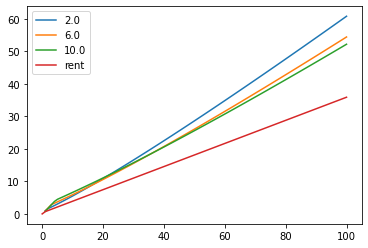

In [5]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = solver.cFuncHse_now(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.plot(M, solver.rental_solution.cFuncRnt(M), label="rent")
plt.legend()
plt.show()

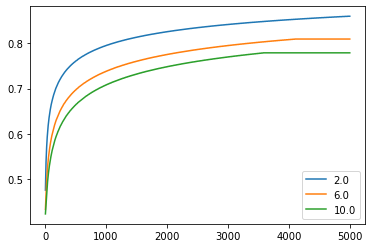

In [6]:
M = np.linspace(0.0, 5000, 1000)
for h in np.linspace(2.0, 10.0, 3):
    C = solver.cFuncHse_now.derivativeX(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.legend()
plt.show()


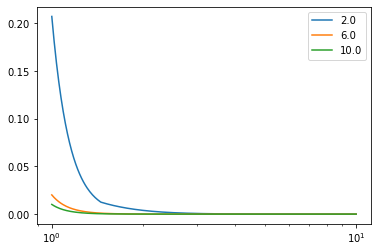

In [7]:
M = np.linspace(1.0, 10, 1000)
for h in np.linspace(2.0, 10.0, 3):
    C = solver.vPfuncHse_now(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.legend()
plt.xscale("log")
plt.show()

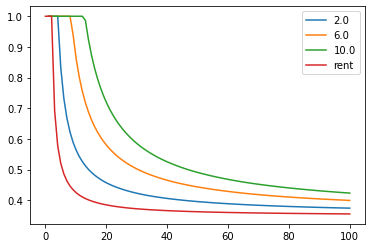

In [8]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = solver.ShareFuncHse_now(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.plot(M, solver.rental_solution.ShareFuncRnt(M), label="rent")
plt.legend()
plt.show()

In [9]:
agent.solve()

KeyboardInterrupt: 

In [ ]:
agent.track_vars = ["mNrm", "hNrm", "haveHse", "cNrm", "aNrm", "pLvl", "aLvl", "Share", "RentShk", "Adjust", "t_age", "t_cycle"]
agent.AgentCount = 1000
agent.T_sim = 81
agent.initialize_sim()

In [ ]:
agent.simulate()

In [ ]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = agent.solution[0].cFuncHse(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.plot(M, agent.solution[0].cFuncRnt(M), label="rent")
plt.legend()
plt.show()

In [ ]:
M = np.linspace(0.0, 5000, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = agent.solution[0].cFuncHse.derivativeX(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.legend()
plt.show()


In [ ]:
M = np.linspace(0.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = agent.solution[0].ShareFuncHse(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.plot(M, agent.solution[0].ShareFuncRnt(M), label="rent")
plt.legend()
plt.show()

In [ ]:
M = np.linspace(1.0, 100, 100)
for h in np.linspace(2.0, 10.0, 3):
    C = agent.solution[0].vFuncHse(M, h * np.ones_like(M))
    plt.plot(M, C, label=h)
plt.legend()
plt.show()

In [ ]:
ShareFuncRnt = [soln.ShareFuncRnt for soln in agent.solution]

M = np.linspace(0.0, 100, 100)
for func in ShareFuncRnt:
    C = func(M)
    plt.plot(M, C)
plt.show()

In [ ]:
vFuncRnt = [soln.vFuncRnt for soln in agent.solution]

M = np.linspace(1.0, 100, 100)
for func in vFuncRnt:
    C = func(M)
    plt.plot(M, C)
plt.show()

In [ ]:
agent_portfolio = PortfolioConsumerType(**init_portfolio_risky_housing)
agent_portfolio.solve()

In [ ]:
ShareFuncAdj = [soln.ShareFuncAdj for soln in agent_portfolio.solution]

M = np.linspace(0.0, 100, 100)
for func in ShareFuncAdj:
    C = func(M)
    plt.plot(M, C)
plt.show()